In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
file1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
file1.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
#Change headers names.

In [4]:
file1.columns = [column.lower() for column in file1.columns] 
file1.head()

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [13]:
file1

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [15]:
file1.customer.nunique()

9134

In [17]:
file1= file1.drop_duplicates(subset=None, keep="first", inplace=False)


In [18]:
file1.customer.nunique()

9134

In [19]:
file1 = file1.set_index("customer")

In [23]:
file1

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [21]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10873 entries, DK49336 to IV32877
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10259 non-null  object 
 1   customer lifetime value        10873 non-null  float64
 2   response                       10259 non-null  object 
 3   coverage                       10873 non-null  object 
 4   education                      10873 non-null  object 
 5   effective to date              10873 non-null  object 
 6   employmentstatus               10873 non-null  object 
 7   gender                         10873 non-null  object 
 8   income                         10873 non-null  int64  
 9   location code                  10873 non-null  object 
 10  marital status                 10873 non-null  object 
 11  monthly premium auto           10873 non-null  int64  
 12  months since last claim        10250 non-nu

In [22]:
file1.state.unique()

array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

In [24]:
file1.gender.unique()

array(['M', 'F'], dtype=object)

In [25]:
file1.isna().sum()

state                             614
customer lifetime value             0
response                          614
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           623
months since policy inception       0
number of open complaints         623
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     608
vehicle size                      608
vehicle type                     5465
dtype: int64

In [26]:
file1 = file1.dropna()

In [27]:
file1

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,Urban,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,Suburban,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,Urban,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,Suburban,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,Suburban,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,Suburban,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A


In [28]:
file1.isna().sum()

state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

In [29]:
file1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [30]:
file1_numerical = file1.select_dtypes("number")
file1_numerical

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer,,,,,,,,
LZ68649,14947.917300,22139,100,34.0,31,0.0,2,480.000000
XL78013,22332.439460,49078,97,10.0,3,0.0,2,484.013411
HG93801,5154.764074,82730,127,13.0,31,0.0,1,442.521087
KR82385,5454.587929,66334,69,25.0,25,0.0,4,331.200000
FH51383,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...
PP30874,3579.023825,28304,91,10.0,30,2.0,1,655.200000
SU71163,2771.663013,59855,74,30.0,82,4.0,1,355.200000
QI63521,19228.463620,0,187,14.0,32,0.0,2,897.600000


In [31]:
file1_cat = file1.select_dtypes("object")
file1_cat

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,
LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
HG93801,Arizona,No,Extended,High School or Below,1/2/11,Employed,M,Urban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
KR82385,California,No,Basic,Master,1/26/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
FH51383,California,No,Basic,High School or Below,2/7/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP30874,California,No,Extended,High School or Below,1/24/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize,A
SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,A
QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize,A


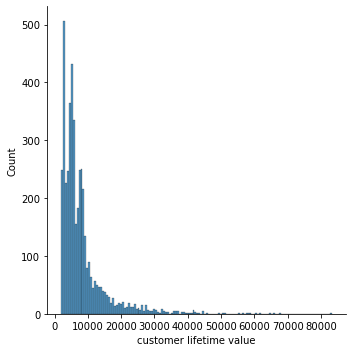

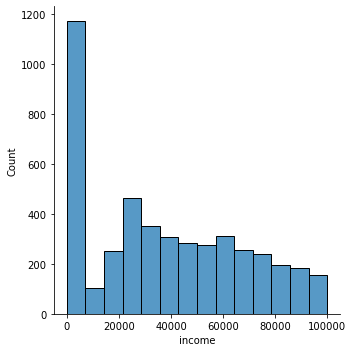

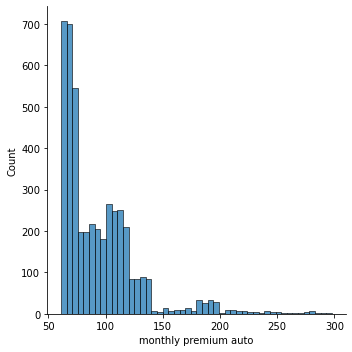

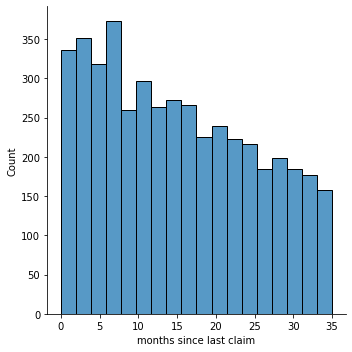

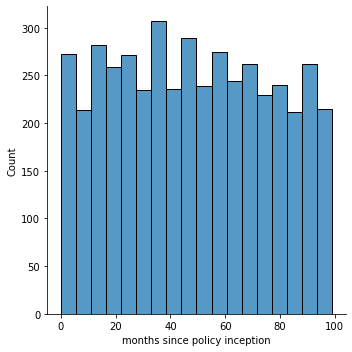

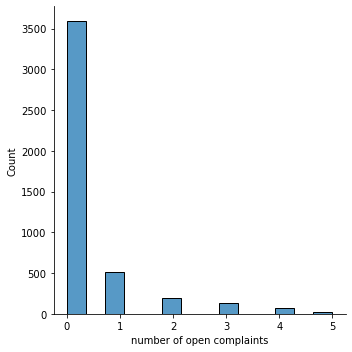

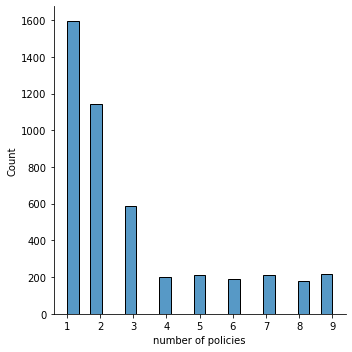

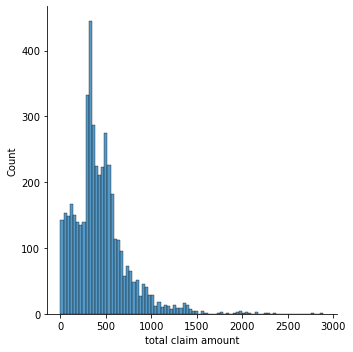

In [32]:
for column in file1_numerical.columns:
    sns.displot(file1[column])
plt.show()

In [36]:
file1.corr().apply(lambda x: round(x,2))

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.00,0.02,0.41,0.03,0.02,-0.03,0.02,0.23
income,0.02,1.00,-0.01,-0.01,-0.01,0.00,-0.01,-0.36
monthly premium auto,0.41,-0.01,1.00,0.00,0.03,-0.00,-0.03,0.63
months since last claim,0.03,-0.01,0.00,1.00,-0.04,-0.00,0.00,-0.01
months since policy inception,0.02,-0.01,0.03,-0.04,1.00,-0.00,-0.01,0.01
number of open complaints,-0.03,0.00,-0.00,-0.00,-0.00,1.00,0.01,-0.00
number of policies,0.02,-0.01,-0.03,0.00,-0.01,0.01,1.00,0.00
total claim amount,0.23,-0.36,0.63,-0.01,0.01,-0.00,0.00,1.00


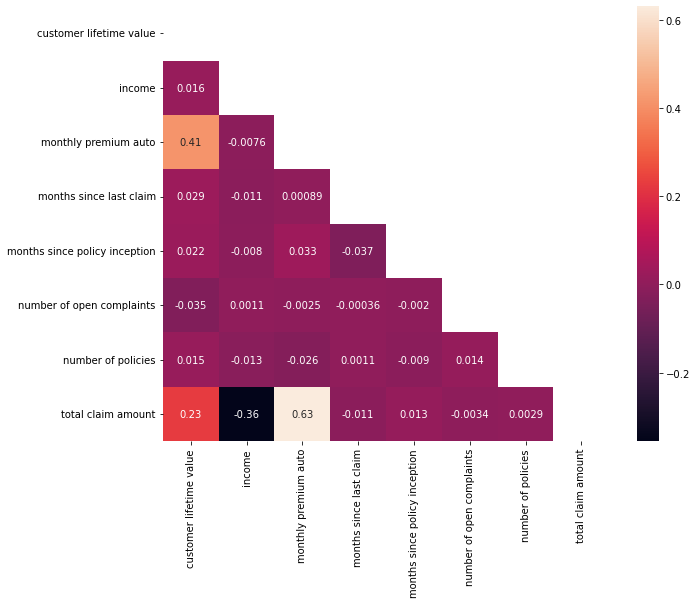

In [39]:
mask = np.zeros_like(file1.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(10,8))
ax =sns.heatmap(file1.corr(), mask=mask, annot=True)
plt.show()

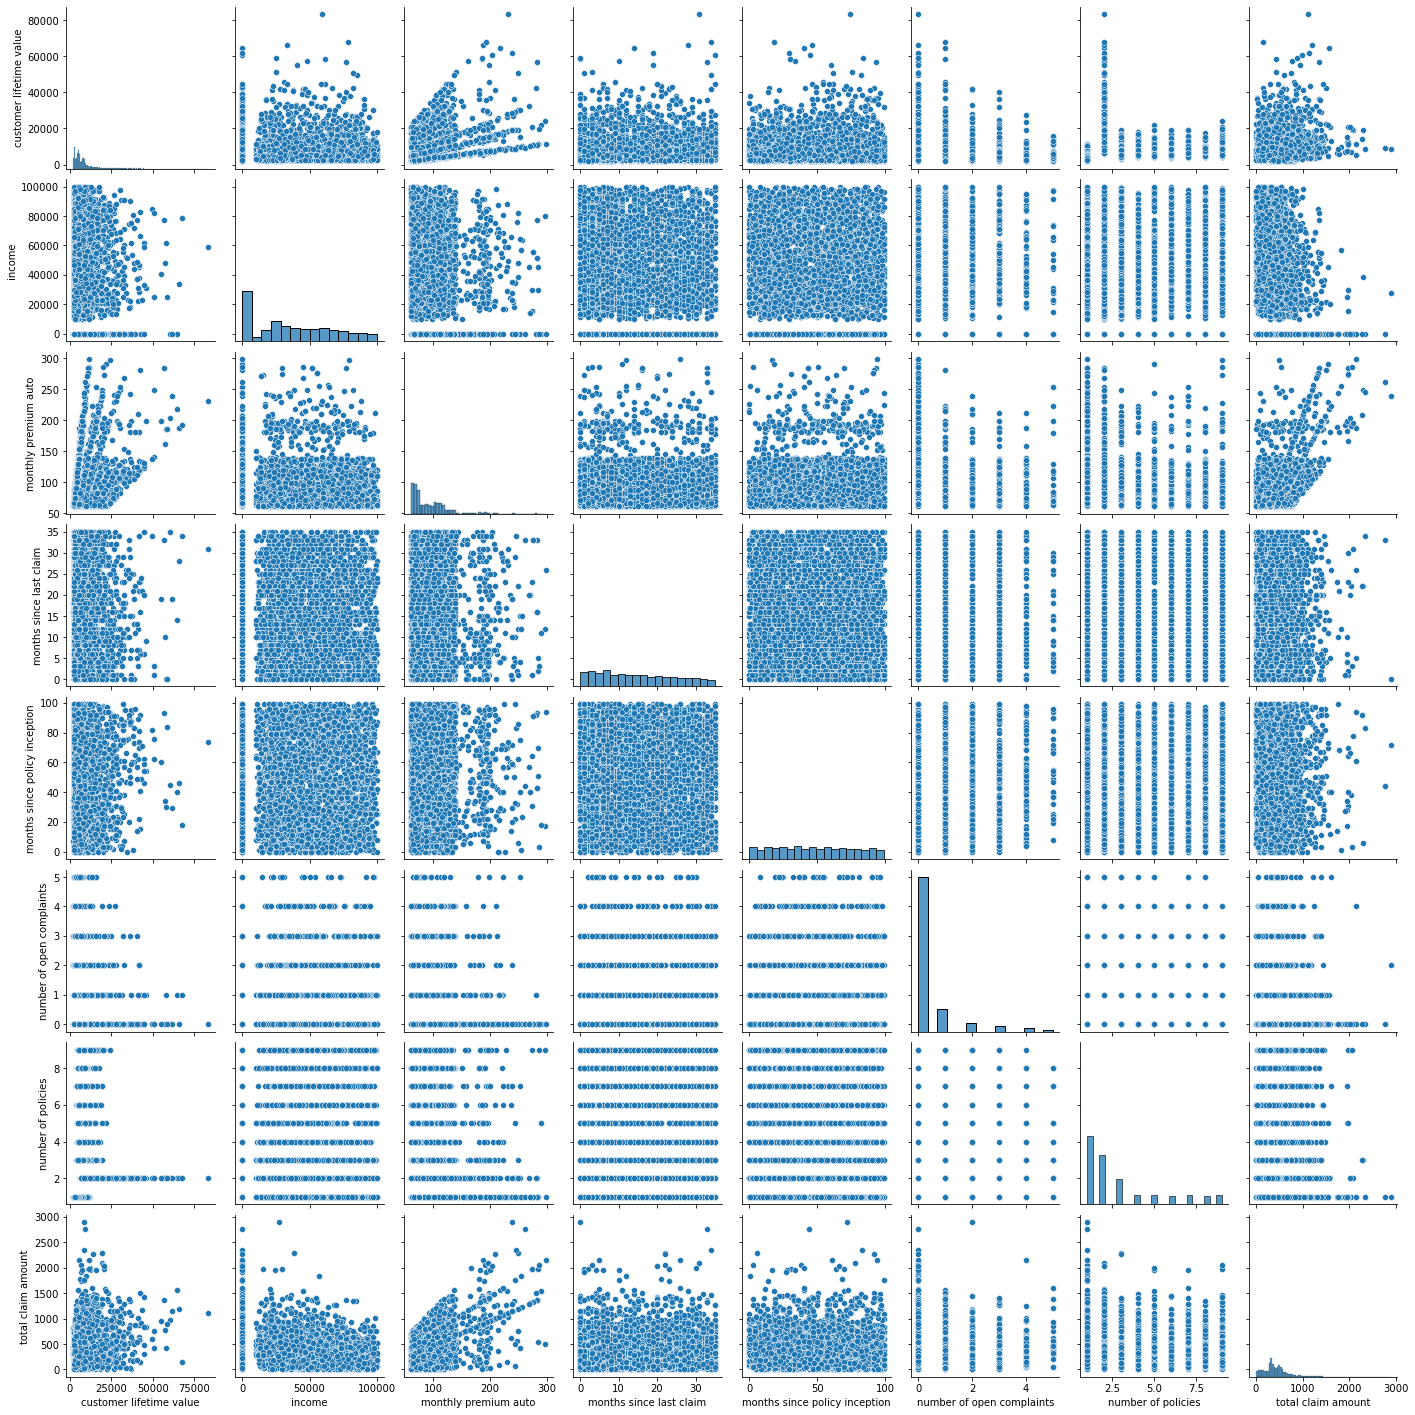

In [40]:
sns.pairplot(file1)

In [45]:
def boxcoxtf(file1):
    numeric = file1.select_dtypes(np.number).columns
    _ci = {column:None for column in numeric}
    for column in numeric:
        file1[column] =np.where(file1[column]<=0,np.NAN,file1[column])
        file1[column] = file1[column].fillna(file1[column].mean())
        transformed_data, ci =stats.boxcox(file1[column])
        file1[column]= transformed_data
        _ci[column] =[ci]
    return file1, _ci
file1,_ci=boxcoxtf(file1)
file1.head()
        

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,Washington,2.813516,No,Basic,Bachelor,2/10/11,Employed,M,818.499446,Suburban,...,0.627832,0.610074,Personal Auto,Personal L3,Offer3,Call Center,36.199068,SUV,Medsize,A
XL78013,Oregon,2.827504,Yes,Extended,College,1/11/11,Employed,M,1345.444288,Suburban,...,0.627832,0.610074,Corporate Auto,Corporate L3,Offer2,Branch,36.348584,Four-Door Car,Medsize,A
HG93801,Arizona,2.765623,No,Extended,High School or Below,1/2/11,Employed,M,1863.688719,Urban,...,0.627832,0.000000,Corporate Auto,Corporate L3,Offer2,Branch,34.769408,SUV,Large,A
KR82385,California,2.768628,No,Basic,Master,1/26/11,Employed,M,1623.756765,Suburban,...,0.627832,1.080002,Personal Auto,Personal L3,Offer4,Call Center,30.093783,Two-Door Car,Medsize,A
FH51383,California,2.767374,No,Basic,High School or Below,2/7/11,Employed,F,1777.980094,Urban,...,0.627832,1.303114,Personal Auto,Personal L3,Offer4,Call Center,28.662271,Two-Door Car,Large,A


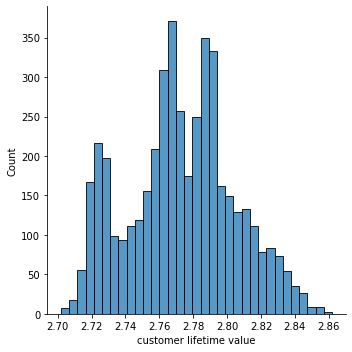

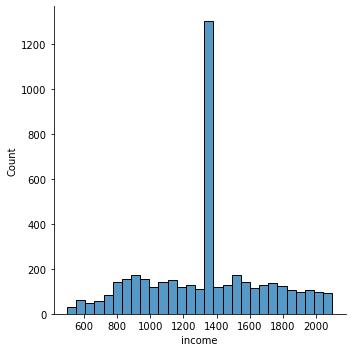

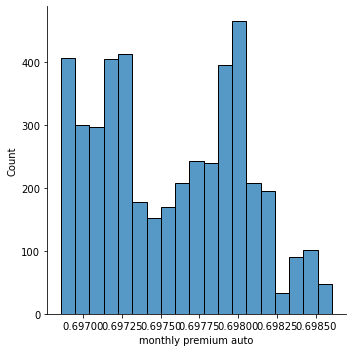

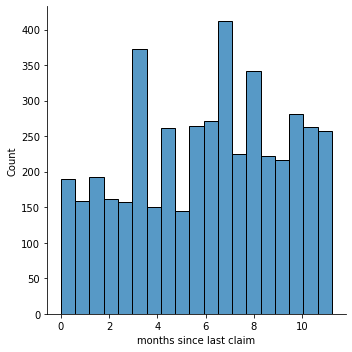

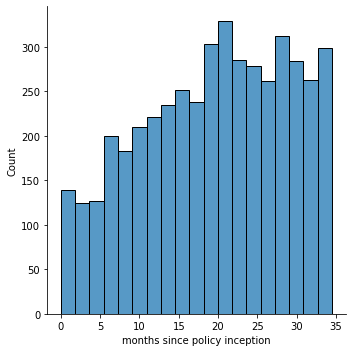

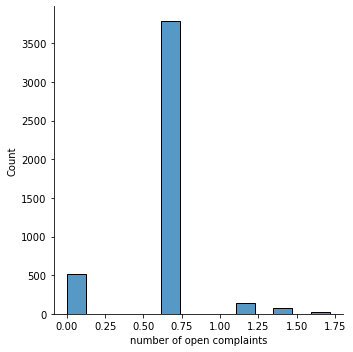

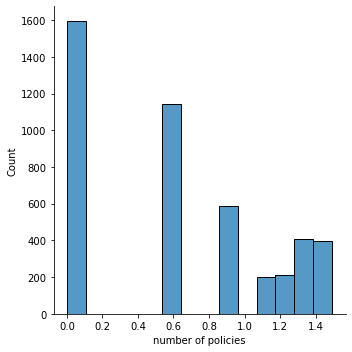

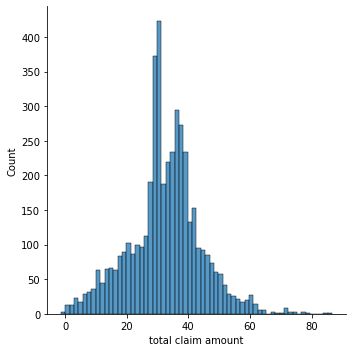

In [46]:
for column in file1_numerical.columns:
    sns.displot(file1[column])
plt.show()

In [47]:
file1_copy = file1.copy()

In [54]:
def remove_outliers(file1_copy, fill=False, threshold=2, skip_columns=["dob"]):
        
        median = np.median(file1_copy.values, axis=0)
        diff = np.sum((file1_copy.values - median) ** 2, axis=-1)
        diff = np.sqrt(diff)
        med_abs_deviation = np.median(diff)
        modified_z_score = 0.6745 * diff / med_abs_deviation
        file1_copy[modified_z_score > threshold] = np.nan

        if fill:
            file1_copy = file1_copy.interpolate(method='polynomial', order=2)
        file1_copy = file1_copy.dropna()
        return file1_copy

In [55]:
file1_copy

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,Washington,2.813516,No,Basic,Bachelor,2/10/11,Employed,M,818.499446,Suburban,...,0.627832,0.610074,Personal Auto,Personal L3,Offer3,Call Center,36.199068,SUV,Medsize,A
XL78013,Oregon,2.827504,Yes,Extended,College,1/11/11,Employed,M,1345.444288,Suburban,...,0.627832,0.610074,Corporate Auto,Corporate L3,Offer2,Branch,36.348584,Four-Door Car,Medsize,A
HG93801,Arizona,2.765623,No,Extended,High School or Below,1/2/11,Employed,M,1863.688719,Urban,...,0.627832,0.000000,Corporate Auto,Corporate L3,Offer2,Branch,34.769408,SUV,Large,A
KR82385,California,2.768628,No,Basic,Master,1/26/11,Employed,M,1623.756765,Suburban,...,0.627832,1.080002,Personal Auto,Personal L3,Offer4,Call Center,30.093783,Two-Door Car,Medsize,A
FH51383,California,2.767374,No,Basic,High School or Below,2/7/11,Employed,F,1777.980094,Urban,...,0.627832,1.303114,Personal Auto,Personal L3,Offer4,Call Center,28.662271,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP30874,California,2.744765,No,Extended,High School or Below,1/24/11,Employed,F,954.213785,Suburban,...,0.712542,0.000000,Personal Auto,Personal L2,Offer2,Agent,42.201437,Four-Door Car,Medsize,A
SU71163,Arizona,2.728519,No,Basic,College,1/7/11,Employed,M,1522.889245,Suburban,...,1.465328,0.000000,Personal Auto,Personal L2,Offer2,Branch,31.165324,Two-Door Car,Medsize,A
QI63521,Nevada,2.822513,No,Basic,High School or Below,2/24/11,Unemployed,M,1369.462803,Suburban,...,0.627832,0.610074,Personal Auto,Personal L2,Offer1,Branch,49.230641,Luxury SUV,Medsize,A


In [57]:
y = file1["total claim amount"]
X= file1.drop(["total claim amount"],axis=1)

In [58]:
X.head()

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,Washington,2.813516,No,Basic,Bachelor,2/10/11,Employed,M,818.499446,Suburban,...,14.463756,0.627832,0.610074,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
XL78013,Oregon,2.827504,Yes,Extended,College,1/11/11,Employed,M,1345.444288,Suburban,...,1.656390,0.627832,0.610074,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
HG93801,Arizona,2.765623,No,Extended,High School or Below,1/2/11,Employed,M,1863.688719,Urban,...,14.463756,0.627832,0.000000,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,A
KR82385,California,2.768628,No,Basic,Master,1/26/11,Employed,M,1623.756765,Suburban,...,12.235503,0.627832,1.080002,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize,A
FH51383,California,2.767374,No,Basic,High School or Below,2/7/11,Employed,F,1777.980094,Urban,...,5.752157,0.627832,1.303114,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Large,A


In [59]:
y.head()

customer
LZ68649    36.199068
XL78013    36.348584
HG93801    34.769408
KR82385    30.093783
FH51383    28.662271
Name: total claim amount, dtype: float64

In [60]:
X_cat = pd.get_dummies(file1_cat, drop_first=True)
X_cat

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
XL78013,0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
HG93801,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
KR82385,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
FH51383,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP30874,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
SU71163,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
QI63521,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [62]:
X = pd.concat([file1_numerical, X_cat], axis=1)
X.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,state_California,state_Nevada,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
customer,,,,,,,,,,,,,,,,,,,,,
LZ68649,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0,0,...,0,1,0,0,0,1,0,0,1,0
XL78013,22332.439460,49078,97,10.0,3,0.0,2,484.013411,0,0,...,1,0,0,0,0,0,0,0,1,0
HG93801,5154.764074,82730,127,13.0,31,0.0,1,442.521087,0,0,...,1,0,0,0,0,1,0,0,0,0
KR82385,5454.587929,66334,69,25.0,25,0.0,4,331.200000,1,0,...,0,1,0,0,0,0,0,1,1,0
FH51383,5326.677654,76717,66,26.0,10,0.0,6,300.528579,1,0,...,0,1,0,0,0,0,0,1,0,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
predictions = model.predict(X_test)

In [69]:
predictions

array([39.47770369, 30.19957337, 31.05943021, ..., 39.31256442,
       15.90915334, 28.72547632])

In [73]:
r2=  r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test,predictions, squared=False)
MSE =  mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test,predictions)

In [76]:
print ("R2 is:",r2)
print ("RMSE is:",RMSE)
print ("MSE is:",MSE)
print ("MAE is:",MAE)

R2 is: 0.9605220938198873
RMSE is: 2.230692221126402
MSE is: 4.97598778539384
MAE is: 1.3562606039771286


In [80]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci["total claim amount"])

In [81]:
RMSE = mean_squared_error(y_test,predictions, squared=False)
MSE =  mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test,predictions)
print ("R2 is:",r2)
print ("RMSE is:",RMSE)
print ("MSE is:",MSE)
print ("MAE is:",MAE)

R2 is: 0.9605220938198873
RMSE is: 496.9247561953952
MSE is: 246934.213319853
MAE is: 399.9090134615739


In [84]:
results = pd.DataFrame()
results["true"] = inv_boxcox(y_test, _ci["total claim amount"])
results["pred"] = predictions


In [88]:
results["diff"] = results.apply(lambda x: abs(x["true"]- x["pred"]),axis=1)
results

,true,pred,diff
customer,,,
KY32675,620.011594,572.106428,47.905166
WD38315,304.156333,333.529707,29.373374
QU58523,345.600000,352.788388,7.188388
TM98684,297.600000,326.850649,29.250649
EH13261,351.403677,364.750536,13.346859
...,...,...,...
SI20178,528.000000,530.822109,2.822109
IE15348,371.802628,348.099955,23.702673
NW41789,604.800000,567.261044,37.538956


In [89]:
results.sort_values("diff",ascending=False).head(50)

,true,pred,diff
customer,,,
BZ65376,2893.239678,4496.381412,1603.141734
FO35655,2345.413441,3148.971145,803.557704
QE21030,1961.162049,2381.279506,420.117457
FV72595,1554.089517,1800.559023,246.469506
DJ91267,494.395024,271.593341,222.801683
XL81489,1439.676002,1655.024080,215.348078
SR74929,1443.455106,1642.241512,198.786406
LC42182,422.438297,237.240968,185.197329
GT89774,363.865389,198.217203,165.648186


<AxesSubplot:xlabel='true', ylabel='pred'>

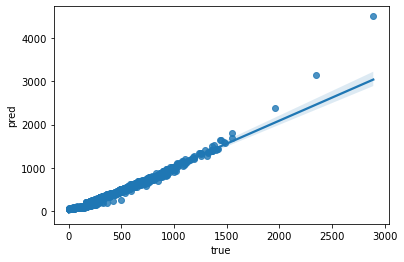

In [90]:
sns.regplot(results["true"],results["pred"])